In [1]:
import numpy as np
import xarray as xr
import gcsfs
from matplotlib import pyplot as plt
from xgcm import Grid
from xhistogram.xarray import histogram
%matplotlib inline
from matplotlib import colors as cols
import scipy.special as sp
from intake import open_catalog
import cmocean

In [2]:
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/channel.yaml")
ds01  = cat["channel_ridge_resolutions_01km"].to_dask()
ds05  = cat["channel_ridge_resolutions_05km"].to_dask()
ds20  = cat["channel_ridge_resolutions_20km"].to_dask()

In [3]:
plt.rcParams.update({'font.size': 16})

In [4]:
grid20 = Grid(ds20, periodic='X')
grid05 = Grid(ds05, periodic='X')
grid01 = Grid(ds01, periodic='X')

In [5]:
horispace01 = 1e3
horispace05 = 5e3
horispace20 = 20e3
time_index = 0
depth = -50
f =  -0.83e-4
daytime = 86400
alpha = 2e-4
gravity = 9.81

ybound = 5e5

In [6]:

depth = 0
vort01_0 = grid01.interp(grid01.interp((grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace01

strain01_0 = ((grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid01.interp(grid01.interp(grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') + grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace01




depth = 0
vort05_0 = grid05.interp(grid05.interp((grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'X') - grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace05

strain05_0 = ((grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'X') - grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid05.interp(grid05.interp(grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'X') + grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace05



depth = 0
vort20_0 = grid20.interp(grid20.interp((grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'X') - grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace20
strain20_0 = ((grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'X') - grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid20.interp(grid20.interp(grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'X') + grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace20

In [7]:
vortband01 = np.linspace(-7, 7, 240)
strainband01 = np.linspace(.5e-3, 7, 240)

ybound = 5e5

binbox01 =  (vortband01[1]-vortband01[0])*(strainband01[1]-strainband01[0])

vort_01_0 = (vort01_0.sel(YC = slice(ybound,2e6-ybound))/f).rename('vort1_0')
strain_01_0 = (abs(strain01_0.sel(YC = slice(ybound,2e6-ybound))/f)).rename('strain1_0')


hist01 = histogram(vort_01_0,strain_01_0,dim = ['XC','YC'] , bins=[vortband01,strainband01])
hist01.load()


vort_05_0 = (vort05_0.sel(YC = slice(ybound,2e6-ybound))/f).rename('vort1_0')
strain_05_0 = (abs(strain05_0.sel(YC = slice(ybound,2e6-ybound))/f)).rename('strain1_0')

hist05 = histogram(vort_05_0,strain_05_0,dim = ['XC','YC'], bins=[vortband01,strainband01])
hist05.load()


vort_20_0 = (vort20_0.sel(YC = slice(ybound,2e6-ybound))/f).rename('vort1_0')
strain_20_0 = (abs(strain20_0.sel(YC = slice(ybound,2e6-ybound))/f)).rename('strain1_0')


hist20 = histogram(vort_20_0,strain_20_0,dim = ['XC','YC'] , bins=[vortband01,strainband01])
hist20.load()


<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 239, strain1_0_bin: 239)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * time           (time) timedelta64[ns] 79210 days 79220 days ... 79550 days
  * vort1_0_bin    (vort1_0_bin) float64 -6.971 -6.912 -6.854 ... 6.912 6.971
  * strain1_0_bin  (strain1_0_bin) float64 0.01514 0.04443 ... 6.956 6.985

<ipython-input-8-2436e7ef7a7a>:6: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  test.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')


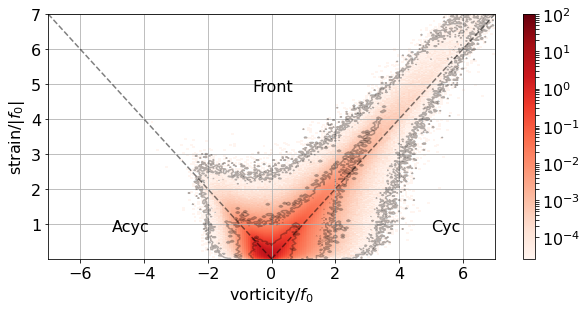

In [8]:
plt.figure(figsize=(10,4.5))

girbNums01 = len(vort_01_0.YC)*len(vort_01_0.XC)
test = (1/(binbox01*girbNums01)*(hist01.rename('')).mean(dim='time').T)
test = xr.where(test<1e-5,np.nan,test)
test.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
# plt.contour(np.linspace(-7, 7, 59), np.linspace(.5e-3, 7, 59), binbox01*(1**2)*hab01_00.mean(dim='time').T, levels=[0.5e1,1.5e2,1e4],colors ='k')
# plt.title('1km')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((1**2)/(binbox01*2000**2)*hist01.mean(dim='time').T), levels=[1e-5], colors='k', alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((5**2)/(binbox01*2000**2)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k', alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),((20**2)/(binbox01*2000**2)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k', alpha=.3)
plt.plot(np.linspace(0,-7,10),np.linspace(0,7,10),'k--',alpha=.5)
plt.plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.5)
# plt.plot(np.linspace(0,7),np.sqrt(2)*np.linspace(0,7),'k:',alpha=.5)
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')

plt.text(-.6,4.8,'Front')
plt.text(5,.8,'Cyc')
plt.text(-5,.8,'Acyc')
plt.rc('grid', color='black', alpha=.3)
plt.grid()

In [9]:

# grid coarsing 1km->5km

temp_U = grid01.interp(ds01.U.sel(Z=0,method='nearest'),'X')
U_cg = temp_U

temp_V = grid01.interp(ds01.V.sel(Z=0,method='nearest'),'Y',boundary='extend')
V_cg = temp_V




kil = 3

for i in range(1,kil):
    temp_U_shiftXp = temp_U.shift(XC=i)
    temp_U_shiftXn = temp_U.shift(XC=-i)
    temp_V_shiftXp = temp_V.shift(XC=i)
    temp_V_shiftXn = temp_V.shift(XC=-i)
    for j in range(1,kil):
        U_cg = (temp_U_shiftXp.shift(YC=i) + temp_U_shiftXp.shift(YC=-i) + temp_U_shiftXn.shift(YC=i) + temp_U_shiftXn.shift(YC=-i) + U_cg)
        V_cg = (temp_V_shiftXp.shift(YC=i) + temp_V_shiftXp.shift(YC=-i) + temp_V_shiftXn.shift(YC=i) + temp_V_shiftXn.shift(YC=-i) + V_cg)
    U_cg = U_cg + temp_U_shiftXp + temp_U_shiftXn
    V_cg = V_cg + temp_V_shiftXp + temp_V_shiftXn
    
U_cg = U_cg + temp_U.shift(YC=1) + temp_U.shift(YC=-1) + temp_U.shift(YC=2) + temp_U.shift(YC=-2)
V_cg = V_cg + temp_V.shift(YC=1) + temp_V.shift(YC=-1) + temp_V.shift(YC=2) + temp_V.shift(YC=-2)




U_cg = U_cg/(2*kil-1)**2
V_cg = V_cg/(2*kil-1)**2

In [10]:
U_cg_skip = U_cg[:,::5,::5]
V_cg_skip = V_cg[:,::5,::5]


In [14]:
U_cg_tempArray = xr.DataArray(U_cg_skip.values, coords=[ds05.time.values,ds05.YC.values,ds05.XC.values], dims=['time','YC','XC'])
V_cg_tempArray = xr.DataArray(V_cg_skip.values, coords=[ds05.time.values,ds05.YC.values,ds05.XC.values], dims=['time','YC','XC'])

In [15]:
### remove nan
U_cg05 = U_cg_tempArray.isel(XC=slice(1+kil,400-kil)).isel(YC=slice(1+kil,400-kil))
V_cg05 = V_cg_tempArray.isel(XC=slice(1+kil,400-kil)).isel(YC=slice(1+kil,400-kil))

In [16]:
grid05_cg = Grid(ds05.isel(XC=slice(1+kil,400-kil),XG=slice(1+kil,400-kil),YC=slice(1+kil,400-kil),YG=slice(1+kil,400-kil)), periodic='X')

In [17]:
vort05_cg = (grid05_cg.interp(grid05_cg.diff(V_cg05, 'X'),'X') - 
             grid05_cg.interp(grid05_cg.diff(U_cg05, 'Y', boundary='extend'),'Y', boundary='extend'))/horispace05

strain05_cg = ((grid05_cg.interp(grid05_cg.diff(V_cg05, 'X'),'X')+grid05_cg.interp(grid05_cg.diff(U_cg05, 'Y', boundary='extend'),'Y', boundary='extend'))**2 
              + (grid05_cg.interp(grid05_cg.diff(U_cg05, 'X'),'X') - grid05_cg.interp(grid05_cg.diff(V_cg05, 'Y', boundary='extend'),'Y', boundary='extend'))**2)**(0.5)/horispace05

In [19]:
vort_05_0_cg = (vort05_cg/f).sel(YC = slice(ybound,2e6-ybound)).rename('vort1_0')
strain_05_0_cg = (abs(strain05_cg/f)).sel(YC = slice(ybound,2e6-ybound)).rename('strain1_0')
hab05_cg = histogram(vort_05_0_cg,strain_05_0_cg,dim = ['XC','YC'] , bins=[vortband01,strainband01])
hab05_cg.load()

<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 239, strain1_0_bin: 239)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * time           (time) timedelta64[ns] 36010 days 06:00:00 ... 36350 days ...
  * vort1_0_bin    (vort1_0_bin) float64 -6.971 -6.912 -6.854 ... 6.912 6.971
  * strain1_0_bin  (strain1_0_bin) float64 0.01514 0.04443 ... 6.956 6.985

In [22]:

# grid coarsing 1km->20km

temp_U = grid01.interp(ds01.U.sel(Z=0,method='nearest'),'X')
U_cg = temp_U

temp_V = grid01.interp(ds01.V.sel(Z=0,method='nearest'),'Y',boundary='extend')
V_cg = temp_V




kil = 11

for i in range(1,kil):
    temp_U_shiftXp = temp_U.shift(XC=i)
    temp_U_shiftXn = temp_U.shift(XC=-i)
    temp_V_shiftXp = temp_V.shift(XC=i)
    temp_V_shiftXn = temp_V.shift(XC=-i)
    for j in range(1,kil):
        U_cg = (temp_U_shiftXp.shift(YC=i) + temp_U_shiftXp.shift(YC=-i) + temp_U_shiftXn.shift(YC=i) + temp_U_shiftXn.shift(YC=-i) + U_cg)
        V_cg = (temp_V_shiftXp.shift(YC=i) + temp_V_shiftXp.shift(YC=-i) + temp_V_shiftXn.shift(YC=i) + temp_V_shiftXn.shift(YC=-i) + V_cg)
    U_cg = U_cg + temp_U_shiftXp + temp_U_shiftXn
    V_cg = V_cg + temp_V_shiftXp + temp_V_shiftXn
    
U_cg = U_cg + temp_U.shift(YC=1) + temp_U.shift(YC=-1) + temp_U.shift(YC=2) + temp_U.shift(YC=-2)
V_cg = V_cg + temp_V.shift(YC=1) + temp_V.shift(YC=-1) + temp_V.shift(YC=2) + temp_V.shift(YC=-2)




U_cg = U_cg/(2*kil-1)**2
V_cg = V_cg/(2*kil-1)**2

In [24]:
U_cg20_skip = U_cg[:,::20,::20]
V_cg20_skip = V_cg[:,::20,::20]

In [25]:
U_cg20_tempArray = xr.DataArray(U_cg20_skip.values, coords=[ds20.time.values,ds20.YC.values,ds20.XC.values], dims=['time','YC','XC'])
V_cg20_tempArray = xr.DataArray(V_cg20_skip.values, coords=[ds20.time.values,ds20.YC.values,ds20.XC.values], dims=['time','YC','XC'])

In [26]:
grid20_cg = Grid(ds20.isel(XC=slice(1+1,100-1),XG=slice(1+1,100-1),YC=slice(1+1,100-1),YG=slice(1+1,100-1)), periodic='X')

U_cg20 = U_cg20_tempArray.isel(XC=slice(1+1,100-1),YC=slice(1+1,100-1))
V_cg20 = V_cg20_tempArray.isel(XC=slice(1+1,100-1),YC=slice(1+1,100-1))

In [27]:
vort20_cg = (grid20_cg.interp(grid20_cg.diff(V_cg20,'X'),'X') - 
             grid20_cg.interp(grid20_cg.diff(U_cg20, 'Y', boundary='extend'),'Y', boundary='extend'))/horispace20

strain20_cg = ((grid20_cg.interp(grid20_cg.diff(V_cg20, 'X'),'X')+grid20_cg.interp(grid20_cg.diff(U_cg20, 'Y', boundary='extend'),'Y', boundary='extend'))**2 
              + (grid20_cg.interp(grid20_cg.diff(U_cg20, 'X'),'X') - grid20_cg.interp(grid20_cg.diff(V_cg20, 'Y', boundary='extend'),'Y', boundary='extend'))**2)**(0.5)/horispace20

In [29]:
vort_01_20_cg = (vort20_cg/f).sel(YC = slice(ybound,2e6-ybound)).rename('vort1_0')
strain_01_20_cg = (abs(strain20_cg/f)).sel(YC = slice(ybound,2e6-ybound)).rename('strain1_0')

hab20_cg = histogram(vort_01_20_cg,strain_01_20_cg, dim = ['XC','YC'] , bins=[vortband01,strainband01])
hab20_cg.load()

<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 239, strain1_0_bin: 239)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * time           (time) timedelta64[ns] 79210 days 79220 days ... 79550 days
  * vort1_0_bin    (vort1_0_bin) float64 -6.971 -6.912 -6.854 ... 6.912 6.971
  * strain1_0_bin  (strain1_0_bin) float64 0.01514 0.04443 ... 6.956 6.985

<ipython-input-30-e4a3fe766dfd>:7: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  temp05.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
<ipython-input-30-e4a3fe766dfd>:23: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  temp20.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
<ipython-input-30-e4a3fe766dfd>:41: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  temp05cg.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
<ipython-input-30-e4a3fe766dfd>:57: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  temp20cg.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')


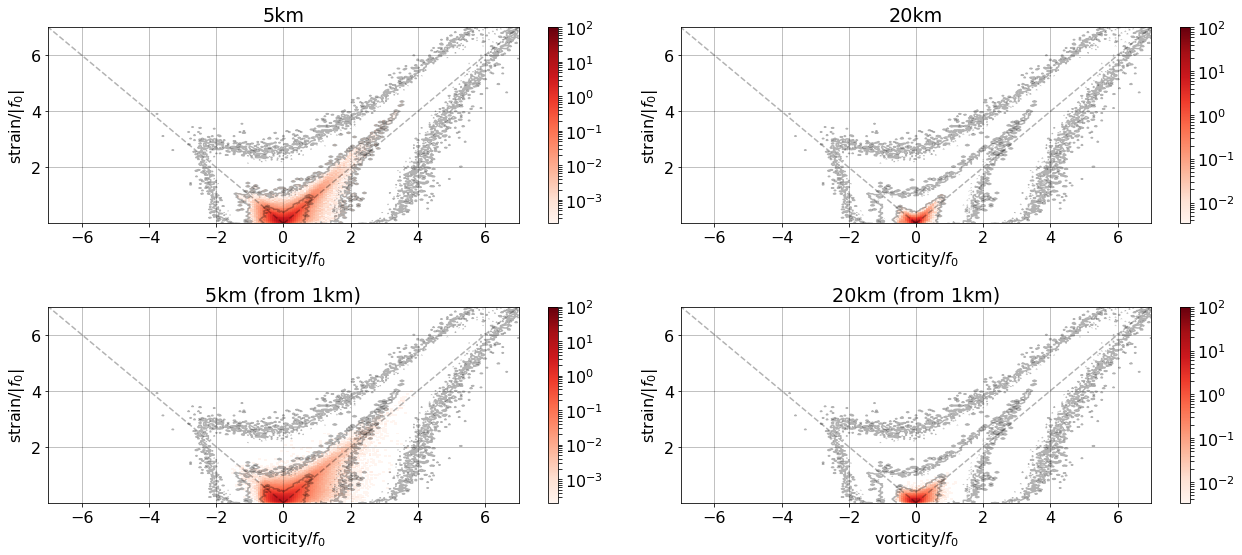

In [30]:
plt.figure(figsize=(18,8))

plt.subplot(221)
girbNums05 = len(vort_05_0.YC)*len(strain_05_0.XC)
temp05 = (1/(binbox01*girbNums05)*(hist05.rename('')).mean(dim='time').T)
temp05 = xr.where(temp05<1e-5,np.nan,temp05)
temp05.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((1**2)/(binbox01*girbNums01)*hist01.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((5**2)/(binbox01*girbNums01)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),((20**2)/(binbox01*girbNums01)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
plt.title('5km')
plt.plot(np.linspace(0,-7,29),np.linspace(0,7,29),'k--',alpha=.3)
plt.plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')
plt.grid()


plt.subplot(222)
girbNums20 = len(vort_20_0.YC)*len(strain_20_0.XC)
temp20 = (1/(binbox01*girbNums20)*(hist20.rename('')).mean(dim='time').T)
temp20 = xr.where(temp20<1e-5,np.nan,temp20)
temp20.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
# plt.contour(np.linspace(-3, 3, 49), np.linspace(.5e-3, 3, 49), binbox05*(5**2)*hab05_00.mean(dim='time').T, levels=[0.5e1,1.5e2,1e4],colors ='k')
plt.title('20km')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((1**2)/(binbox01*girbNums01)*hist01.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((5**2)/(binbox01*girbNums01)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),((20**2)/(binbox01*girbNums01)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
plt.plot(np.linspace(0,-7,29),np.linspace(0,7,29),'k--',alpha=.3)
plt.plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')
plt.grid()



plt.subplot(223)
girbNums05 = len(vort_05_0.YC)*len(strain_05_0.XC)
temp05cg = (1/(binbox01*girbNums05)*(hab05_cg.rename('')).mean(dim='time').T)
temp05cg = xr.where(temp05cg<1e-5,np.nan,temp05cg)
temp05cg.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((1**2)/(binbox01*girbNums01)*hist01.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((5**2)/(binbox01*girbNums01)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),((20**2)/(binbox01*girbNums01)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
plt.title('5km (from 1km)')
plt.plot(np.linspace(0,-7,29),np.linspace(0,7,29),'k--',alpha=.3)
plt.plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')
plt.grid()


plt.subplot(224)
girbNums20 = len(vort_20_0.YC)*len(strain_20_0.XC)
temp20cg = (1/(binbox01*girbNums20)*(hab20_cg.rename('')).mean(dim='time').T)
temp20cg = xr.where(temp20cg<1e-5,np.nan,temp20cg)
temp20cg.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
# plt.contour(np.linspace(-3, 3, 49), np.linspace(.5e-3, 3, 49), binbox05*(5**2)*hab05_00.mean(dim='time').T, levels=[0.5e1,1.5e2,1e4],colors ='k')
plt.title('20km (from 1km)')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((1**2)/(binbox01*girbNums01)*hist01.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((5**2)/(binbox01*girbNums01)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),((20**2)/(binbox01*girbNums01)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
plt.plot(np.linspace(0,-7,29),np.linspace(0,7,29),'k--',alpha=.3)
plt.plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')
plt.grid()


plt.tight_layout()